# Assignment 1

### Sprencz Robert

### Initialization

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from seaborn import scatterplot, heatmap

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import Ridge
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error

from joblib import dump

### Read & shuffle the dataset

In [3]:
df = pd.read_csv("./dataset_reoffending.csv")

df = df.sample(frac=1,random_state=2)
df.reset_index(drop=True, inplace=True)

### Basic informations

In [4]:
df.shape

(25835, 53)

In [5]:
features=list(df.columns)
#features

In [6]:
df.describe(include="all")

,id,gender,race,age,address,gang_affiliated,risk_score,supervision_level,education_level,dependents,...,cocaine_positive_tests,meth_positive_tests,other_positive_tests,days_employed,jobs_per_year,employment_exempt,reoffended_within_3_years,reoffended_in_year_1,reoffended_in_year_2,reoffended_in_year_3
count,25835.000000,25835,25835,25835,25835.000000,22668,25360.000000,24115,25835,25835,...,20663.000000,20663.000000,20663.00000,25373.000000,25027.000000,25835,25835,25835,25835,25835
unique,NaN,2,2,7,NaN,2,NaN,3,3,4,...,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,NaN,M,black,23-27,NaN,False,NaN,Standard,High School Diploma,0,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
freq,NaN,22668,14847,5176,NaN,18730,NaN,9983,11390,8037,...,NaN,NaN,NaN,NaN,NaN,22399,14904,18111,21268,23222
mean,13314.004838,NaN,NaN,NaN,12.361796,NaN,6.082216,NaN,NaN,NaN,...,0.013741,0.012890,0.00755,0.482331,0.769295,NaN,NaN,NaN,NaN,NaN
std,7722.206327,NaN,NaN,NaN,7.133742,NaN,2.381442,NaN,NaN,NaN,...,0.061233,0.060581,0.04115,0.425004,0.813787,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6626.500000,NaN,NaN,NaN,6.000000,NaN,4.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,13270.000000,NaN,NaN,NaN,12.000000,NaN,6.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.475728,0.635217,NaN,NaN,NaN,NaN,NaN
75%,20021.500000,NaN,NaN,NaN,18.000000,NaN,8.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.00000,0.969325,1.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    25835 non-null  int64  
 1   gender                                25835 non-null  object 
 2   race                                  25835 non-null  object 
 3   age                                   25835 non-null  object 
 4   address                               25835 non-null  int64  
 5   gang_affiliated                       22668 non-null  object 
 6   risk_score                            25360 non-null  float64
 7   supervision_level                     24115 non-null  object 
 8   education_level                       25835 non-null  object 
 9   dependents                            25835 non-null  object 
 10  offence                               22558 non-null  object 
 11  years_in_prison

In [8]:
for feature in features:
    print(feature, df[feature].unique())

id [12869 20883 18277 ...  6795  2633 24524]
gender ['F' 'M']
race ['white' 'black']
age ['28-32' '33-37' '48 or older' '18-22' '43-47' '23-27' '38-42']
address [17 18  9 19 20 15  3 22 23  7 11  5 25 10  4  8 14 12 24  2 21 16  6  1
 13]
gang_affiliated [nan False True]
risk_score [ 8.  6.  4.  7.  9.  1. 10.  2.  5.  3. nan]
supervision_level ['High' 'Standard' 'Specialized' nan]
education_level ['At least some college' 'High School Diploma' 'Less than HS diploma']
dependents ['3 or more' '0' '2' '1']
offence ['Property' 'Violent/Non-Sex' nan 'Other' 'Drug' 'Violent/Sex']
years_in_prison ['Less than 1 year' '1-2 years' 'More than 3 years'
 'Greater than 2 to 3 years']
felony_arrests ['3' '5' '2' '4' '6' '10 or more' '9' '0' '7' '1' '8']
misdemeanor_arrests ['2' '6 or more' '1' '0' '4' '3' '5']
violence_arrests ['0' '3 or more' '2' '1']
property_arrests ['2' '5 or more' '1' '4' '3' '0']
drug_arrests ['1' '0' '3' '4' '2' '5 or more']
parole_violation_arrests ['2' '4' '5 or more' '0' '3

### Overview of the basic info & dataset cleaning

#### Looking at our dataset we can see that it is huge, but there are a few things that need to be improved.

- In many places we have NULL values
  - For gang affiliation we can see that for some reason women don't have their gang affiliation listed. Looking at SimpleImputer strategies, I decided that constant would be the best choice. I chose not tracked, since women can also be part of gangs.
  - For Risk score I decided to delete NULLS,
  - For Supervision, I delete, because if I don't know how well the criminal was supervised, i can not be sure how accurate the other data is regarding parole
  - For Offence, I delete rows with missing values, because I think it is a noisy record, they might have forgot to include it.
  - For missing data regarding drug tests, I will delete, because I am curios whether taking any drugs affects reoffension or not
  - For job related data, I decided to replace missing values with 0, since i think it is safe to suppose that they didn't find a job, or that the people who kept track thought that by setting days employed to 0, jobs per year will also stay as 0.
- Id needs to be dropped
- We need to watch out such that the address is treated as a nominal value, not a numeric one


In [9]:
df=df.drop(columns=['id'],errors='ignore') #remove id column
df=df.astype({'address':'string'}) #convert address to nominal
df.dropna(subset=['risk_score','supervision_level','offence','days_between_drug_tests','marijuana_positive_tests','cocaine_positive_tests','meth_positive_tests','other_positive_tests'], inplace=True)
#drop rows with nulls
df=df.fillna({'gang_affiliated': 'Not tracked'})
df=df.astype({'gang_affiliated': 'string'})
features=list(df.columns)
df.reset_index(drop=True, inplace=True)

### Altered dataframe basic info

In [10]:
df.describe(include="all")

,gender,race,age,address,gang_affiliated,risk_score,supervision_level,education_level,dependents,offence,...,cocaine_positive_tests,meth_positive_tests,other_positive_tests,days_employed,jobs_per_year,employment_exempt,reoffended_within_3_years,reoffended_in_year_1,reoffended_in_year_2,reoffended_in_year_3
count,16198,16198,16198,16198,16198,16198.000000,16198,16198,16198,16198,...,16198.000000,16198.000000,16198.000000,16198.000000,16198.000000,16198,16198,16198,16198,16198
unique,2,2,7,25,3,NaN,3,3,4,5,...,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2
top,M,black,23-27,4,False,NaN,Standard,High School Diploma,0,Property,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
freq,14170,9087,3538,1061,11543,NaN,5988,7207,5160,5748,...,NaN,NaN,NaN,NaN,NaN,13991,9352,11775,13089,14378
mean,NaN,NaN,NaN,NaN,NaN,6.423139,NaN,NaN,NaN,NaN,...,0.014545,0.013281,0.007914,0.526367,0.821606,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.317911,NaN,NaN,NaN,NaN,...,0.063223,0.059046,0.041992,0.414982,0.823887,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.595600,0.689151,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.980545,1.004814,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16198 entries, 0 to 16197
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                16198 non-null  object 
 1   race                                  16198 non-null  object 
 2   age                                   16198 non-null  object 
 3   address                               16198 non-null  string 
 4   gang_affiliated                       16198 non-null  string 
 5   risk_score                            16198 non-null  float64
 6   supervision_level                     16198 non-null  object 
 7   education_level                       16198 non-null  object 
 8   dependents                            16198 non-null  object 
 9   offence                               16198 non-null  object 
 10  years_in_prison                       16198 non-null  object 
 11  felony_arrests 

### Feature listing

In [12]:
numeric_features = ['risk_score','days_between_drug_tests','marijuana_positive_tests','cocaine_positive_tests','meth_positive_tests','other_positive_tests','days_employed','jobs_per_year']

nominal_features = ['gender','race','age','address','gang_affiliated','supervision_level',
 'education_level',
 'dependents',
 'offence',
 'years_in_prison',
 'felony_arrests',
 'misdemeanor_arrests',
 'violence_arrests',
 'property_arrests',
 'drug_arrests',
 'parole_violation_arrests',
 'domestic_violence_arrests',
 'gun_arrests',
 'felony_convictions',
 'misdemeanor_convictions',
 'violence_convictions',
 'property_convictions',
 'drug_convictions',
 'parole_violation_convictions',
 'domestic_violence_convictions',
 'gun_convictions',
 'parole_revocations',
 'probation_revocations',
 'mh_sa_programme',
 'cs_programme',
 'other_condition',
 'electronic_monitoring_violations',
 'instruction_following_violations',
 'failure_to_report_violations',
 'moving_without_permission_violations',
 'num_delinquency_reports',
 'num_program_attendances',
 'num_unexcused_absences',
 'num_residence_changes',
'employment_exempt']

recidivism_features=['reoffended_within_3_years','reoffended_in_year_1','reoffended_in_year_2','reoffended_in_year_3']

predictive_features = nominal_features + numeric_features

### Reoffender pie chart

In [13]:
#a function to see when do people reoffend
def is_reoffender(a):
    
    if(a['reoffended_in_year_1']==True):
        return 'First year reoffender'
    if(a['reoffended_in_year_2']==True):
        return 'Second year reoffender'
    if(a['reoffended_in_year_3']==True):
        return 'Third year reoffender'
    return 'Not a reoffender'

<Axes: >

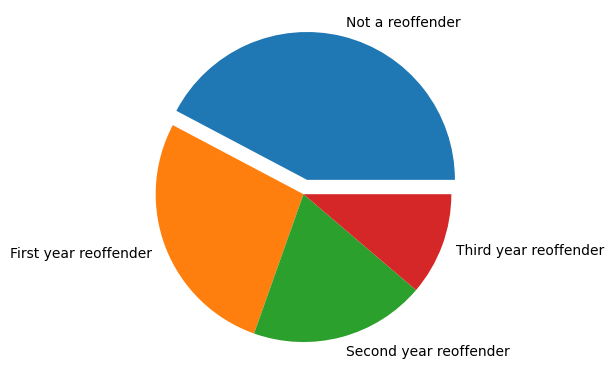

In [14]:
df[recidivism_features].apply(is_reoffender,axis=1).value_counts().plot.pie(label='',explode=(0.1,0,0,0))
#The axis parameter determines if we want to pass a row or not

#### Looking at the picture above we can see that most people reoffend in the next 3 years.

#### Most of them reoffend in the first year

### Splitting

#### Initially I tried to stratify with the union of nominal and recidivism features, but then the sets become too small.

#### This is because the dataset is split into 2^features (some of these sets might be empty or just contain 1 element)

#### So I have to select some features where underrepresentation is a risk

In [15]:
stratify_features=['gender','race','age','gang_affiliated','education_level','reoffended_within_3_years']
df[stratify_features].value_counts()

gender  race   age          gang_affiliated  education_level        reoffended_within_3_years
M       black  23-27        False            Less than HS diploma   True                         364
                                             High School Diploma    True                         363
               28-32        False            Less than HS diploma   True                         357
                                             High School Diploma    True                         304
               23-27        True             Less than HS diploma   True                         304
                                                                                                ... 
        white  48 or older  True             At least some college  False                          1
        black  48 or older  True             High School Diploma    False                          1
                                             At least some college  True                          

In [16]:
stratify_features=['gender','education_level','reoffended_within_3_years']
df[stratify_features].value_counts()

gender  education_level        reoffended_within_3_years
M       High School Diploma    True                         3929
        Less than HS diploma   True                         3468
        High School Diploma    False                        2437
        Less than HS diploma   False                        2170
        At least some college  False                        1140
                               True                         1026
F       High School Diploma    False                         424
                               True                          417
        Less than HS diploma   False                         348
        At least some college  False                         327
        Less than HS diploma   True                          296
        At least some college  True                          216
Name: count, dtype: int64

#### But to keep things simple, first we stratify based only on one feature, which is the outcome (like it is commonly done in real life)

In [17]:
stratify_features=['reoffended_within_3_years']
df[stratify_features].value_counts()

reoffended_within_3_years
True                         9352
False                        6846
Name: count, dtype: int64

In [18]:
dev_df, test_df = train_test_split(df,train_size=0.8,stratify = df[stratify_features],  random_state=2)

### Dummy classifier

In [19]:
dev_X = dev_df[predictive_features]
test_X = test_df[predictive_features]

label_encoder=LabelEncoder()
label_encoder.fit(df['reoffended_within_3_years'])
dev_y = label_encoder.transform(dev_df['reoffended_within_3_years'])
test_y = label_encoder.transform(test_df['reoffended_within_3_years'])


In [20]:
maj=DummyClassifier()
maj.fit(dev_X,dev_y)
accuracy_score(test_y,maj.predict(test_X))

0.5774691358024692

### Some plots

In [21]:
age_and_gender = df[['age','gender']].value_counts().to_frame().reset_index( level = [1])
pivot = pd.pivot_table(data = age_and_gender, index=['age'],columns=['gender'],values='count')
pivot

gender,F,M
age,,
18-22,86.0,1301.0
23-27,374.0,3164.0
28-32,400.0,2770.0
33-37,367.0,2254.0
38-42,285.0,1516.0
43-47,260.0,1341.0
48 or older,256.0,1824.0


I spent a looot of time writing these four lines of code, so let's break it down:
- first, I extract the columns age and gender from my dataframe, then count how many times they occur
- this gives me a Series, however a Dataframe is more useful in this situation, so I convert it
- Now the interesting part: by making selections from the dataframe using a list and counting them, everything that is in the list becomes an index
- This makes our dataframe Multi-Indexed, which needs to be simplified. To do this I reset my index (the level parameter marks which indexes to "downgrade")
- next up I use a pivot Table to reorganize my data
- I choose age to be the key, and I use genders to classify my counts into columns
- From here i just have to do a barplot and stack my items

<Axes: xlabel='age'>

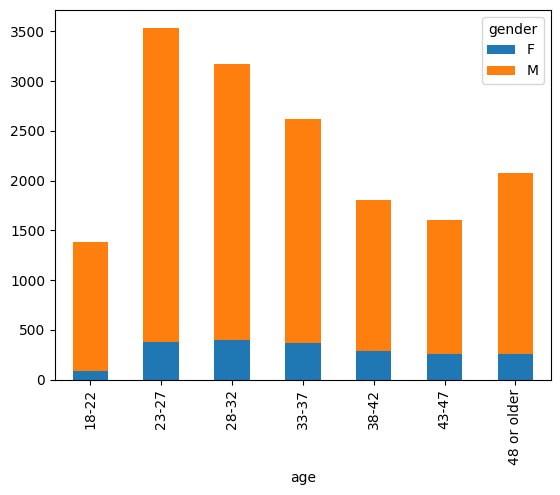

In [22]:
pivot.plot.bar(stacked='True')

#### Looking at this plot we can see that a vast majority of ex-inmates are male, with most of them falling in the 23-27 age group

### Preprocessing

In [23]:
preprocessor = ColumnTransformer([
    ("numeric",StandardScaler(),
     numeric_features),
    ('nominal', Pipeline([
        ("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ("binarizer",OneHotEncoder(handle_unknown="ignore"))
    ]),
    nominal_features)
    ],
    remainder='passthrough'
)

In [24]:
ss = ShuffleSplit(n_splits=1, train_size=0.75, random_state=2) #We can use a simple shuffle split, because our dataset is huge

### Pipelining

In [25]:
knn = Pipeline([
    ("preprocessor",preprocessor),
    ("predictor",KNeighborsClassifier())
])

##knn_param_grid={"predictor__n_neighbors": [9,10,11]}
knn_param_grid={"predictor__n_neighbors": range(8,15)}

knn_gs = GridSearchCV(knn, knn_param_grid, scoring="accuracy", cv=ss, refit=True)

knn_gs.fit(dev_X,dev_y)

knn_gs.best_params_,knn_gs.best_score_


({'predictor__n_neighbors': 14}, 0.6570987654320988)

In [26]:
logistic = Pipeline([
    ("preprocessor",preprocessor),
    ("predictor",LogisticRegression())
])

np.mean(cross_val_score(logistic,dev_X, dev_y, scoring="accuracy", cv=ss))

0.7021604938271605

In [27]:
logistic.fit(dev_X,dev_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['risk_score',
                                                   'days_between_drug_tests',
                                                   'marijuana_positive_tests',
                                                   'cocaine_positive_tests',
                                                   'meth_positive_tests',
                                                   'other_positive_tests',
                                                   'days_employed',
                                                   'jobs_per_year']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='m...
                                                   'domestic_violence_arrests',
                                                   'gun_arrests',
                                                   'felony_convictions',
                                                   'misdemeanor_convictions',
                                                   'violence_convictions',
                                                   'property_convictions',
                                                   'drug_convictions',
                                                   'parole_violation_convictions',
                                                   'domestic_violence_convictions',
                                                   'gun_convictions',
                                                   'parole_revocations',
                                                   'probation_revocations',
                                                   'mh_sa_programme',
                                                   'cs_programme', ...])])),
                ('predictor', LogisticRegression())])

### Re-splitting

#### We saw how our model did with the dataset stratified based only on the outcome. Now let's see what happens if we put in more features.

In [28]:
stratify_features=['gender','education_level','race','reoffended_within_3_years']
df[stratify_features].value_counts()

gender  education_level        race   reoffended_within_3_years
M       Less than HS diploma   black  True                         2292
        High School Diploma    black  True                         2158
                               white  True                         1771
                               black  False                        1357
        Less than HS diploma   black  False                        1310
                               white  True                         1176
        High School Diploma    white  False                        1080
        Less than HS diploma   white  False                         860
        At least some college  black  False                         669
                                      True                          614
                               white  False                         471
                                      True                          412
F       High School Diploma    white  True                          311


In [29]:
dev_df_smp, test_df_smp = train_test_split(df,train_size=0.8,stratify = df[stratify_features],  random_state=2)
# smp means: stratify multiple property

dev_X_smp = dev_df_smp[predictive_features]
test_X_smp = test_df_smp[predictive_features]

label_encoder=LabelEncoder()
label_encoder.fit(df['reoffended_within_3_years'])
dev_y_smp = label_encoder.transform(dev_df['reoffended_within_3_years'])
test_y_smp = label_encoder.transform(test_df['reoffended_within_3_years'])

maj=DummyClassifier()
maj.fit(dev_X_smp,dev_y_smp)
accuracy_score(test_y_smp,maj.predict(test_X_smp))

0.5774691358024692

In [30]:
preprocessor = ColumnTransformer([
    ("numeric",StandardScaler(),
     numeric_features),
    ('nominal', Pipeline([
        ("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ("binarizer",OneHotEncoder(handle_unknown="ignore"))
    ]),
    nominal_features)
    ],
    remainder='passthrough'
)

In [31]:
knn_smp = Pipeline([
    ("preprocessor",preprocessor),
    ("predictor",KNeighborsClassifier())
])

knn_param_grid={"predictor__n_neighbors": range(10,20)}

knn_gs_smp = GridSearchCV(knn, knn_param_grid, scoring="accuracy", cv=ss, refit=True)

knn_gs_smp.fit(dev_X_smp,dev_y_smp)

knn_gs_smp.best_params_,knn_gs_smp.best_score_

({'predictor__n_neighbors': 11}, 0.537962962962963)

In [32]:
logistic_smp = Pipeline([
    ("preprocessor",preprocessor),
    ("predictor",LogisticRegression())
])

np.mean(cross_val_score(logistic_smp,dev_X_smp, dev_y_smp, scoring="accuracy", cv=ss))

0.5552469135802469

In [33]:
logistic_smp.fit(dev_X_smp,dev_y_smp)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['risk_score',
                                                   'days_between_drug_tests',
                                                   'marijuana_positive_tests',
                                                   'cocaine_positive_tests',
                                                   'meth_positive_tests',
                                                   'other_positive_tests',
                                                   'days_employed',
                                                   'jobs_per_year']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='m...
                                                   'domestic_violence_arrests',
                                                   'gun_arrests',
                                                   'felony_convictions',
                                                   'misdemeanor_convictions',
                                                   'violence_convictions',
                                                   'property_convictions',
                                                   'drug_convictions',
                                                   'parole_violation_convictions',
                                                   'domestic_violence_convictions',
                                                   'gun_convictions',
                                                   'parole_revocations',
                                                   'probation_revocations',
                                                   'mh_sa_programme',
                                                   'cs_programme', ...])])),
                ('predictor', LogisticRegression())])

#### Looking at these numbers we can see that stratification by multiple features didn't really help us.

#### In fact, we are doing even worse than a dummy classifier

#### I started reading into it and had some ideas as what could go wrong:
- Simpson's paradox: our data has been split into too many small sets. These small sets however don't reflect what is going on in the big picture. We train our model on various small sets, however, when it gets out to be tested, the tendency might flip.
- There is a disproportion between the sizes of our sets. For example, there are very few black women and if they have outliers, our model might get confused.

#### Takeaway:
- We might try to gather more data, however I doubt that it would help too much
- We are striving too hard to not to discrimate, but by doing so we made a model that would be as right as a coinflip
- KISS: Our simpler stratificaton worked much better.

### Causes for early reoffense

#### I am curious what makes someone relapse quickly

In [34]:
df_early=df.copy()

In [35]:
base=10

def early_reoffender_score(a):
    
    if(a['reoffended_in_year_1']==True):
        return base*base
    if(a['reoffended_in_year_2']==True):
        return base
    if(a['reoffended_in_year_3']==True):
        return 1
    return 0

In [36]:
df_early["early_reoffense_score"]=df_early[recidivism_features].apply(early_reoffender_score,axis=1)

In [37]:
class InsertEarlyReoffence(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["early_reoffense_score"] = X[recidivism_features].apply(early_reoffender_score,axis=1)
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [38]:
preprocessor = ColumnTransformer([
    ("numeric",Pipeline([
        ("scaler",StandardScaler())
    ]),
     numeric_features),
    ('nominal', Pipeline([
        ("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
        ("binarizer",OneHotEncoder(handle_unknown="ignore"))
    ]),
    nominal_features)
    ],
    remainder='passthrough'
)

In [39]:
dev_df_early, test_df_early = train_test_split(df_early,train_size=0.8,  random_state=2)

dev_X_early = dev_df_early[predictive_features]
test_X_early = test_df_early[predictive_features]

dev_y_early = dev_df_early["early_reoffense_score"].values
test_y_early = test_df_early["early_reoffense_score"].values

In [40]:
knn_early = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])

# Create a dictionary of hyperparameters for kNN
knn_param_grid_early = {"predictor__n_neighbors": range(10,20)}

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs_early = GridSearchCV(knn, knn_param_grid, scoring="neg_mean_absolute_error", cv=ss, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
knn_gs_early.fit(dev_X_early, dev_y_early)

# Let's see how well we did
knn_gs_early.best_params_, knn_gs_early.best_score_

({'predictor__n_neighbors': 18}, -27.223765432098766)

In [41]:
linear_model_early = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", LinearRegression())
])

linear_model_early.fit(dev_X_early, dev_y_early)

np.mean(cross_val_score(linear_model_early, dev_X_early, dev_y_early, scoring="neg_mean_absolute_error", cv=ss))

-31.103553689876094

#### Looking at the scores above I realized that we are not too accurate

#### We could display our betas to see what features are the most important. This could give the government an idea to see what programmes to focus on in order to prevent recidivism.

### End testing

In [42]:
accuracy_score(test_y, knn_gs.predict(test_df))

0.674074074074074

In [43]:
accuracy_score(test_y_smp, knn_gs_smp.predict(test_df_smp))

0.5342592592592592

In [44]:
accuracy_score(test_y, logistic.predict(test_df))

0.7290123456790123

In [45]:
accuracy_score(test_y_smp, logistic_smp.predict(test_df_smp))

0.5793209876543209

In [46]:
mean_absolute_error(test_y_early, knn_gs_early.predict(test_X_early))

27.665123456790123

In [47]:
mean_absolute_error(test_y_early, linear_model_early.predict(test_X_early))

31.60222756270913

#### Here we don't have anything unusual, we can pick our most accurate model and send it to the governmeent, then hope they don't use it.

### References

https://mode.com/python-tutorial/counting-and-plotting-in-python/
https://stackoverflow.com/questions/55974754/inverse-label-encoding-for-plotting-purposes
https://www.geeksforgeeks.org/reverting-from-multiindex-to-single-index-dataframe-in-pandas/
https://medium.com/@jb.ranchana/easy-way-to-create-stacked-bar-graphs-from-dataframe-19cc97c86fe3
https://en.wikipedia.org/wiki/Stratified_sampling
https://en.wikipedia.org/wiki/Simpson%27s_paradox
https://scikit-learn.org/stable/index.html
https://pandas.pydata.org/docs/
https://matplotlib.org/stable/